In [1]:
from ema_workbench import save_results, ema_logging
from ema_workbench.util.utilities import load_results
import numpy as np
import pandas as pd
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from dike_model_function import DikeNetwork  # @UnresolvedImport
from ema_workbench import (Model, RealParameter, ScalarOutcome, 
                           MultiprocessingEvaluator, SequentialEvaluator, ema_logging,
                           Scenario, Policy)

from ema_workbench.em_framework.evaluators import BaseEvaluator

from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
 

from problem_formulation import get_model_for_problem_formulation

from ema_workbench.analysis import parcoords, prim

dike_model, planning_steps = get_model_for_problem_formulation(7)

In [3]:
experiments, outcomes = load_results("results/mordm.tar.gz")

[MainProcess/INFO] results loaded succesfully from C:\Users\archipel-03\Documents\GitHub\MBDM\final assignment\results\mordm.tar.gz


In [4]:
y = (outcomes['A.3_Expected Number of Deaths'] > 0.1)

In [9]:
# Scenarios where policies fail
data = pd.DataFrame({k:v[y] for k,v in outcomes.items()})
# All scenarios
all_data = pd.DataFrame({k:v for k,v in outcomes.items()})

# Worst cases

In [10]:
# Find the worst in data
worst_cases = data.iloc[list(data.idxmax())]
worst_cases

,Evacuation Costs,Total investment costs,Expected Annual Damage other dike rings,Expected Number of Deaths other dike rings,A.3_Expected Annual Damage,A.3_Expected Number of Deaths
703,172296.224825,6.205801e+07,1.424576e+09,0.177277,1.454038e+09,0.389177
0,13375.865182,1.418503e+08,1.447637e+07,0.005395,5.610320e+08,0.369725
94,142238.819714,6.787643e+07,4.709665e+09,0.393944,2.311794e+09,0.453889
568,85677.971404,1.001322e+08,4.709665e+09,0.945465,2.311794e+09,1.089333
163,90628.755207,6.787643e+07,1.479792e+08,0.015658,2.911688e+09,0.549863
645,54590.497254,1.001322e+08,1.479792e+08,0.037580,2.911688e+09,1.319670


In [11]:
# Find the corresponding indeces for all_data
keys = list(worst_cases.columns.values)
i1 = all_data.set_index(keys).index
i2 = worst_cases.set_index(keys).index
worst_index = list(all_data[i1.isin(i2)].index)
worst_index

[1, 161, 236, 699, 785, 853]

In [12]:
all_data.iloc[worst_index]

,Evacuation Costs,Total investment costs,Expected Annual Damage other dike rings,Expected Number of Deaths other dike rings,A.3_Expected Annual Damage,A.3_Expected Number of Deaths
1,13375.865182,1.418503e+08,1.447637e+07,0.005395,5.610320e+08,0.369725
161,142238.819714,6.787643e+07,4.709665e+09,0.393944,2.311794e+09,0.453889
236,90628.755207,6.787643e+07,1.479792e+08,0.015658,2.911688e+09,0.549863
699,85677.971404,1.001322e+08,4.709665e+09,0.945465,2.311794e+09,1.089333
785,54590.497254,1.001322e+08,1.479792e+08,0.037580,2.911688e+09,1.319670
853,172296.224825,6.205801e+07,1.424576e+09,0.177277,1.454038e+09,0.389177


In [13]:
# All we need are the uncertainty columns
selected = experiments.loc[worst_index, [o.name for o in dike_model.uncertainties]]
selected

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
1,2.5,2.5,3.5,34.0,232.567891,0.777911,10.0,160.775027,0.767903,1.5,146.946105,0.039300,10.0,97.632114,0.618062,1.0,211.548581,0.229185,1.5
161,2.5,1.5,1.5,24.0,210.837332,0.123387,10.0,183.036689,0.073788,1.5,138.902767,0.045564,1.5,180.817008,0.659529,1.0,212.799036,0.852287,10.0
236,1.5,1.5,1.5,33.0,133.480534,0.751003,1.0,228.854808,0.461140,10.0,50.782683,0.033239,1.0,247.353065,0.510307,1.5,222.798696,0.910786,1.0
699,2.5,1.5,1.5,24.0,210.837332,0.123387,10.0,183.036689,0.073788,1.5,138.902767,0.045564,1.5,180.817008,0.659529,1.0,212.799036,0.852287,10.0
785,1.5,1.5,1.5,33.0,133.480534,0.751003,1.0,228.854808,0.461140,10.0,50.782683,0.033239,1.0,247.353065,0.510307,1.5,222.798696,0.910786,1.0
853,4.5,4.5,3.5,75.0,160.026707,0.394881,1.5,70.506168,0.037045,1.0,284.831716,0.003802,10.0,223.176430,0.929999,1.5,289.447882,0.399382,1.0


# 161 and 699 are the same, as well as 236 and 785

In [14]:
# Drop 785
selected = selected.drop(785)
selected = selected.drop(699)
selected.to_csv("results/selected_ref_scenarios.csv")
selected.to_excel("results/selected_ref_scenarios.xlsx")
selected

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
1,2.5,2.5,3.5,34.0,232.567891,0.777911,10.0,160.775027,0.767903,1.5,146.946105,0.039300,10.0,97.632114,0.618062,1.0,211.548581,0.229185,1.5
161,2.5,1.5,1.5,24.0,210.837332,0.123387,10.0,183.036689,0.073788,1.5,138.902767,0.045564,1.5,180.817008,0.659529,1.0,212.799036,0.852287,10.0
236,1.5,1.5,1.5,33.0,133.480534,0.751003,1.0,228.854808,0.461140,10.0,50.782683,0.033239,1.0,247.353065,0.510307,1.5,222.798696,0.910786,1.0
853,4.5,4.5,3.5,75.0,160.026707,0.394881,1.5,70.506168,0.037045,1.0,284.831716,0.003802,10.0,223.176430,0.929999,1.5,289.447882,0.399382,1.0


C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)
C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:261: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


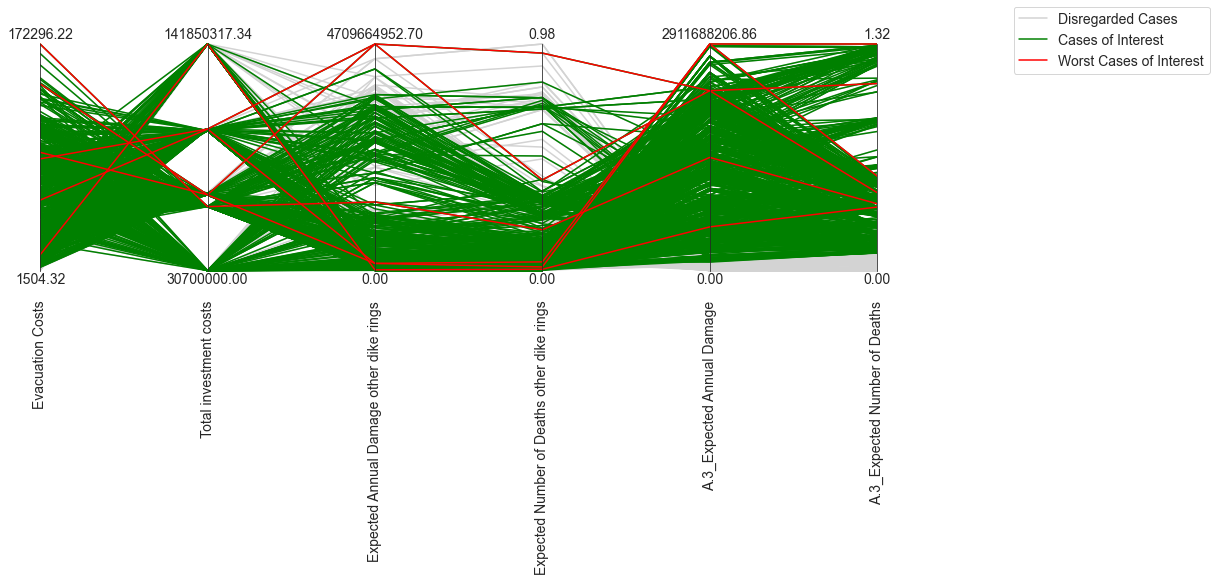

In [15]:
from ema_workbench.analysis import parcoords

# Plot parcoords
limits = parcoords.get_limits(all_data)
axes = parcoords.ParallelAxes(limits)
axes.plot(all_data, color='lightgrey', label="Disregarded Cases")
axes.plot(data, color='green', label="Cases of Interest")
axes.plot(worst_cases, color='red', label="Worst Cases of Interest")
axes.legend()
fig = axes.fig
fig.set_size_inches(15,5)
plt.show()

In [16]:
scenarios = [Scenario(f"{index}", **row) for index, row in selected.iterrows()]

Assignment 7 on hypervolume:

Sometimes it is known a priori. For example in the lake problem, reliability is scalled between 0 and 1. In contrast, the bounds on max_P are not known up front. To help with this, we can introduce a constraint saying that max_P must be below a particulare threshold.

In [17]:
convergence_metrics = [EpsilonProgress()]
nfe= 50000
# 100 grid cells in objective space per outcome
# Based on max values encountered in open exploration
epsilons = [1e5/100, 3.55e9/100, 5.45e9/100, 3.53/100, 2e9/100, 2.5/100]

In [33]:
%%time


try:
    # Only run the experiments again if data hasn't been generated yet
    results_0 = pd.read_csv("results/results_0.csv", index_col=0)
    convergence_0 = pd.read_csv("results/convergence_0.csv", index_col=0)
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results_0, convergence_0 = evaluator.optimize(nfe=nfe, searchover='levers', convergence=convergence_metrics, reference=scenarios[0],
                                 epsilons=epsilons)
          
    results_0.to_csv("results/results_0.csv")
    convergence_0.to_csv("results/convergence_0.csv")
    

try:
    # Only run the experiments again if data hasn't been generated yet
    results_1 = pd.read_csv("results/results_1.csv", index_col=0)
    convergence_1 = pd.read_csv("results/convergence_1.csv", index_col=0)
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results_1, convergence_1 = evaluator.optimize(nfe=nfe, searchover='levers', convergence=convergence_metrics, reference=scenarios[1],
                                 epsilons=epsilons)
          
    results_1.to_csv("results/results_1.csv")
    convergence_1.to_csv("results/convergence_1.csv")

try:
    # Only run the experiments again if data hasn't been generated yet
    results_2 = pd.read_csv("results/results_2.csv", index_col=0)
    convergence_2 = pd.read_csv("results/convergence_2.csv", index_col=0)
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results_2, convergence_2 = evaluator.optimize(nfe=nfe, searchover='levers', convergence=convergence_metrics, reference=scenarios[2],
                                 epsilons=epsilons)
          
    results_2.to_csv("results/results_2.csv")
    convergence_2.to_csv("results/convergence_2.csv")

try:
    # Only run the experiments again if data hasn't been generated yet
    results_3 = pd.read_csv("results/results_3.csv", index_col=0)
    convergence_3 = pd.read_csv("results/convergence_3.csv", index_col=0)
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results_3, convergence_3 = evaluator.optimize(nfe=nfe, searchover='levers', convergence=convergence_metrics, reference=scenarios[3],
                                 epsilons=epsilons)
          
    results_3.to_csv("results/results_3.csv")
    convergence_3.to_csv("results/convergence_3.csv")

Wall time: 18 ms


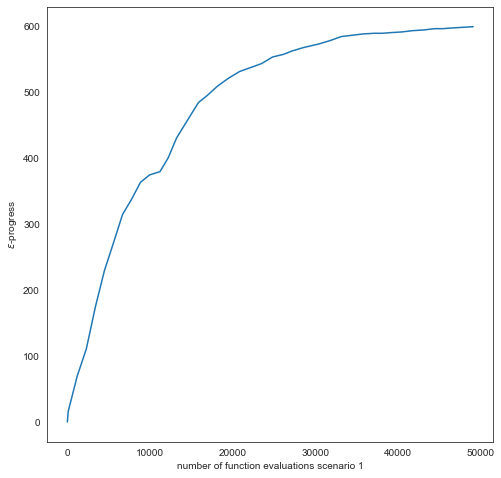

In [34]:
fig, ax = plt.subplots(ncols=1, sharex=True, figsize=(8,8))
ax.plot(convergence_1.nfe, convergence_1.epsilon_progress)
ax.set_ylabel('$\epsilon$-progress')
ax.set_xlabel('number of function evaluations scenario 1')

plt.show()

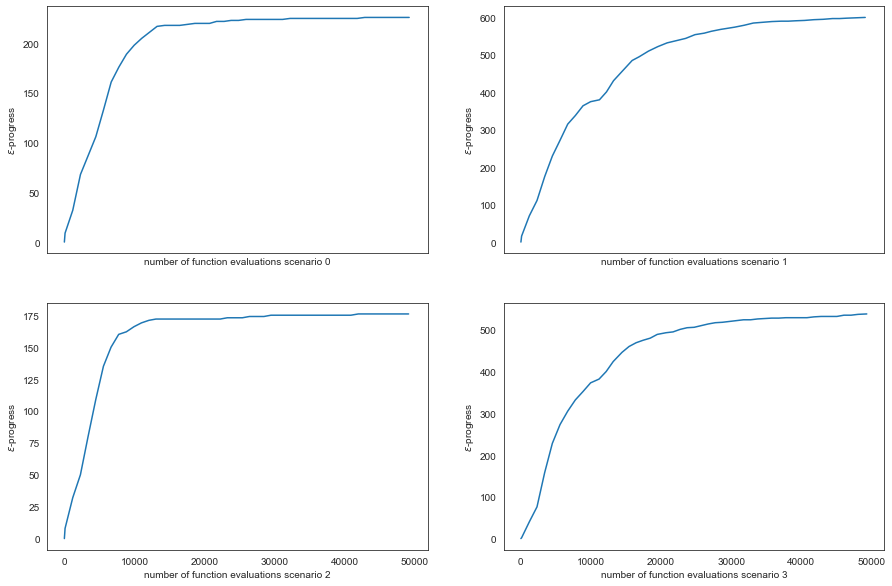

In [42]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(15,10))

axes[0,0].plot(convergence_0.nfe, convergence_0.epsilon_progress)
axes[0,0].set_ylabel('$\epsilon$-progress')
axes[0,0].set_xlabel('number of function evaluations scenario 0')

axes[0,1].plot(convergence_1.nfe, convergence_1.epsilon_progress)
axes[0,1].set_ylabel('$\epsilon$-progress')
axes[0,1].set_xlabel('number of function evaluations scenario 1')

axes[1,0].plot(convergence_2.nfe, convergence_2.epsilon_progress)
axes[1,0].set_ylabel('$\epsilon$-progress')
axes[1,0].set_xlabel('number of function evaluations scenario 2')

axes[1,1].plot(convergence_3.nfe, convergence_3.epsilon_progress)
axes[1,1].set_ylabel('$\epsilon$-progress')
axes[1,1].set_xlabel('number of function evaluations scenario 3')



plt.show()

In [59]:
index_policies_0 = results_0.loc[:, [o.name for o in dike_model.outcomes]].idxmin().unique()
index_policies_1 = results_1.loc[:, [o.name for o in dike_model.outcomes]].idxmin().unique()
index_policies_2 = results_2.loc[:, [o.name for o in dike_model.outcomes]].idxmin().unique()
index_policies_3 = results_3.loc[:, [o.name for o in dike_model.outcomes]].idxmin().unique()

C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)
C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:261: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


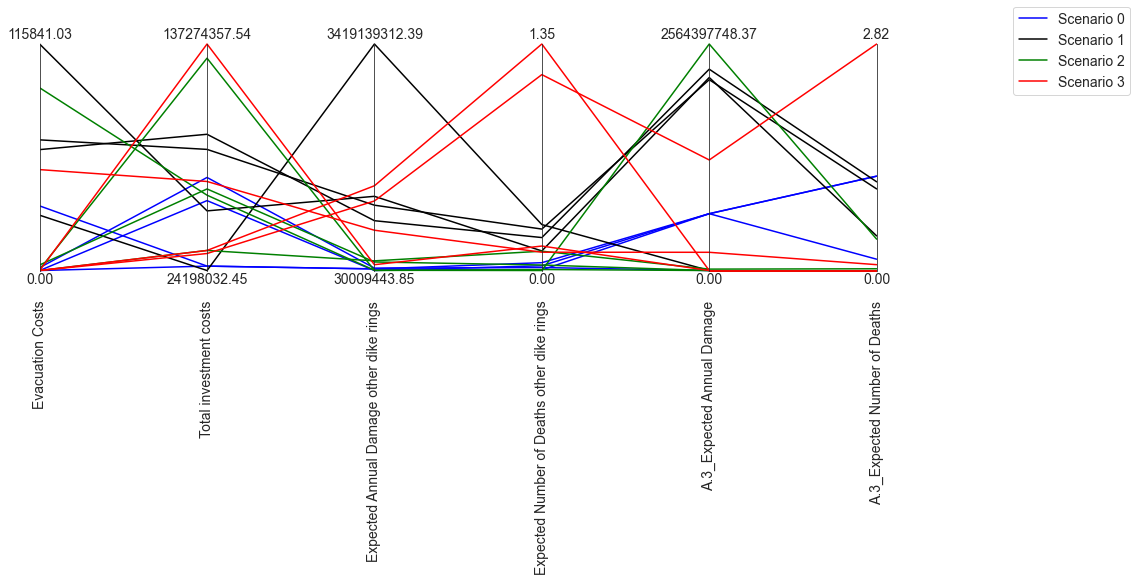

<Figure size 432x288 with 0 Axes>

In [80]:
# Plot parcoords
best_outcomes_0 = results_0.loc[index_policies_0, [o.name for o in dike_model.outcomes]]
best_outcomes_1 = results_1.loc[index_policies_0, [o.name for o in dike_model.outcomes]]
best_outcomes_2 = results_2.loc[index_policies_0, [o.name for o in dike_model.outcomes]]
best_outcomes_3 = results_3.loc[index_policies_0, [o.name for o in dike_model.outcomes]]

test_list = [best_outcomes_0, best_outcomes_1, best_outcomes_2, best_outcomes_3]

best_outcomes = pd.concat([best_outcomes_0, best_outcomes_1, best_outcomes_2, best_outcomes_3])

limits = parcoords.get_limits(best_outcomes)

colors = iter(sns.color_palette())

axes = parcoords.ParallelAxes(limits)

axes.plot(best_outcomes_0, color='blue', label="Scenario 0")
axes.plot(best_outcomes_1, color='black', label="Scenario 1")
axes.plot(best_outcomes_2, color='green', label="Scenario 2")
axes.plot(best_outcomes_3, color='red', label="Scenario 3")
axes.legend()

fig = axes.fig
fig.set_size_inches(15,5)
plt.show()


paraxes.legend()
plt.show()

In [60]:
best_policies_0 = results_0.loc[index_policies_0, [o.name for o in dike_model.levers]]
best_policies_1 = results_1.loc[index_policies_0, [o.name for o in dike_model.levers]]
best_policies_2 = results_2.loc[index_policies_0, [o.name for o in dike_model.levers]]
best_policies_3 = results_3.loc[index_policies_0, [o.name for o in dike_model.levers]]

In [65]:
policies = pd.concat([best_policies_0, best_policies_1, best_policies_2, best_policies_3])
policies = policies.reset_index(drop=True)
policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,0,4,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,9,0,0,2,1,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,7,0,0,0,0,0,0,0,0


# Part 3

## Re-evaluate under deep uncertainty

Combine the pareto set of solutions found for each scenario. Next, turn each solution into a policy object. If you have a very large number of policies, you can choose to down sample your policies in some reasoned way (*e.g.*, picking min and max on each objective, slicing across the pareto front with a particular step size). As a rule of thumb, try to limit the set of policies to at most 50. 

Re-evaluate the combined set of solutions over 1000 scenarios sampled using LHS.

In [66]:
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [67]:
policies_to_evaluate

[Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 4, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0}),
 Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 1, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncre

In [73]:
n_scenarios = 1000

In [145]:
%%time  
try:
    reeevaluation_results = load_results("results/re-evaluated.tar.gz")
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        reeevaluation_results = evaluator.perform_experiments(n_scenarios,
                                                policies_to_evaluate)
    save_results(results, "results/re-evaluated.tar.gz")

[MainProcess/INFO] results loaded succesfully from C:\Users\archipel-03\Documents\GitHub\MBDM\final assignment\results\re-evaluated.tar.gz


Wall time: 226 ms


In [155]:
experiments, outcomes = reeevaluation_results

### Domain Criterion

In [156]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

def costs(data):
    return data[0]/1e6 # makes numbers nicer
    
SMALLER = 'SMALLER'

A_3_expected_number_of_deaths = functools.partial(robustness, SMALLER, 0.02) 
other_expected_number_of_deaths = functools.partial(robustness, SMALLER, 0.08)
evac_costs = functools.partial(robustness, SMALLER, 1e4) 
total_investment_costs = costs


C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


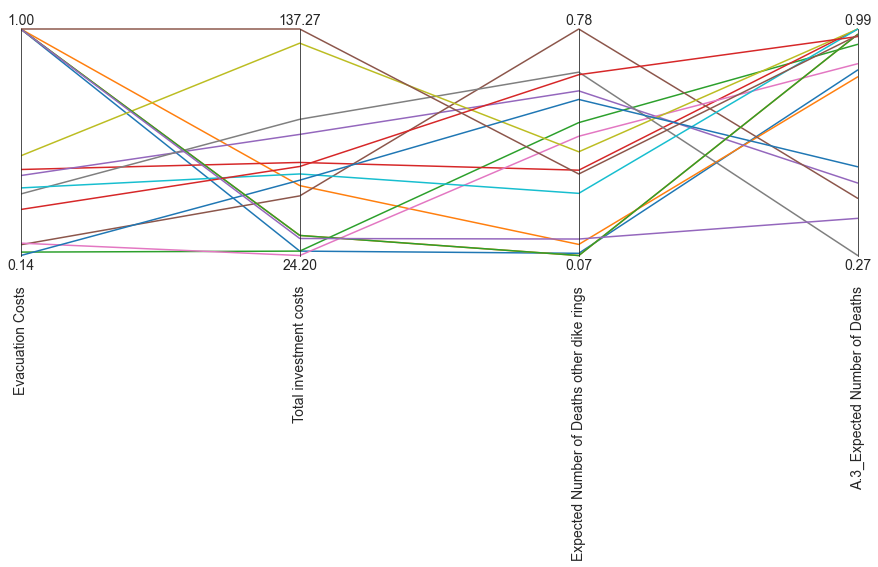

In [157]:
funcs = {'A.3_Expected Number of Deaths':A_3_expected_number_of_deaths,
         'Expected Number of Deaths other dike rings':other_expected_number_of_deaths,
         'Evacuation Costs': evac_costs,
         'Total investment costs': total_investment_costs}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        try:
            score = funcs[k](v)
        except KeyError:
            continue
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
# limits.loc[0, :] = 0
# limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
fig = paraxes.fig
fig.set_size_inches(15,5)
plt.show()

In [158]:
data

,Evacuation Costs,Total investment costs,Expected Number of Deaths other dike rings,A.3_Expected Number of Deaths
0,1.000,26.403380,0.073,0.864
1,1.000,59.098281,0.101,0.842
2,0.152,26.403380,0.485,0.946
3,0.466,70.662154,0.335,0.995
4,0.443,84.672506,0.585,0.502
5,0.180,53.972506,0.780,0.453
6,0.186,24.198032,0.442,0.884
7,0.373,92.217628,0.644,0.270
8,0.518,130.214603,0.393,0.995
9,0.396,64.921562,0.262,0.995


### Max Regret

In [159]:
def calculate_regret(data, best):
    return np.abs(best-data)

In [164]:
overall_regret = {}
max_regret = {}
for outcome in dike_model.outcomes:
    policy_column = experiments['policy']
    
    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome.name: outcomes[outcome.name], 
                         "policy":experiments['policy'],
                         "scenario":experiments['scenario']})
    
    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario', columns='policy')
    
    # flatten the resulting hierarchical index resulting from 
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)
    
    # we need to control the broadcasting. 
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    #
    # basically we take the difference of the maximum across 
    # the row and the actual values in the row
    #
    outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()
    
    overall_regret[outcome.name] = outcome_regret
    max_regret[outcome.name] = outcome_regret.max()

    max_regret = pd.DataFrame(max_regret)

<ipython-input-164-427803e66745>:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()


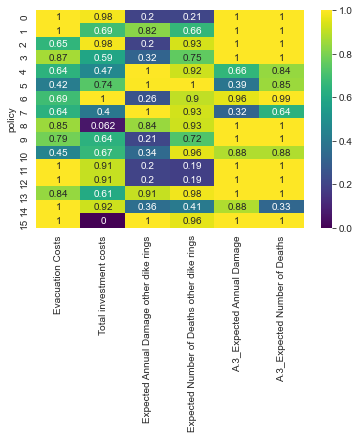

In [165]:
sns.heatmap(max_regret/max_regret.max(), cmap='viridis', annot=True)
plt.show()

In [167]:
max_regret

,Evacuation Costs,Total investment costs,Expected Annual Damage other dike rings,Expected Number of Deaths other dike rings,A.3_Expected Annual Damage,A.3_Expected Number of Deaths
policy,,,,,,
0,160521.830259,1.108710e+08,8.046067e+08,0.571610,2.788116e+09,3.657436
1,160521.830259,7.817608e+07,3.297497e+09,1.803887,2.788116e+09,3.657436
2,105028.493504,1.108710e+08,8.046067e+08,2.550824,2.788116e+09,3.657436
3,138972.970800,6.661220e+07,1.276135e+09,2.058208,2.788116e+09,3.668456
4,102998.617966,5.260185e+07,4.006515e+09,2.524613,1.830813e+09,3.095029
5,67553.463965,8.330185e+07,3.989119e+09,2.729913,1.088457e+09,3.118584
6,110441.484442,1.130763e+08,1.027340e+09,2.463889,2.676473e+09,3.645013
7,102387.107812,4.505673e+07,4.006333e+09,2.543854,9.027173e+08,2.346391
8,136443.274617,7.059754e+06,3.382954e+09,2.527159,2.788116e+09,3.663276


C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


IndexError: list index out of range

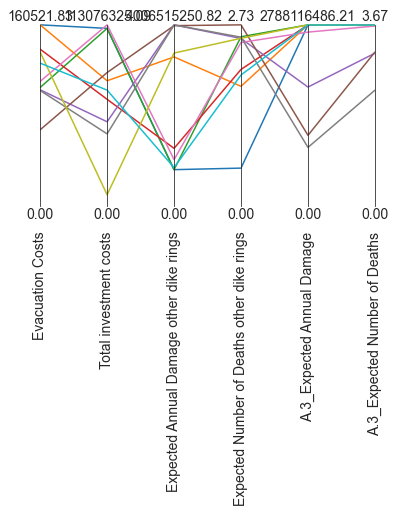

In [166]:
colors = sns.color_palette()

data = max_regret

# makes it easier to identify the policy associated with each line
# in the parcoords plot
# data['policy'] = data.index.astype("float64")

limits = parcoords.get_limits(data)
limits.loc[0, [o.name for o in dike_model.outcomes]] = 0

paraxes = parcoords.ParallelAxes(limits)
for i, (index, row) in enumerate(data.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])

paraxes.legend()
fig = paraxes.fig
fig.set_size_inches(15,5)    
plt.show()

From model answers assignment 8:

Note that we have been looking at the maximum regret. I also saved the distribution of regret over the set of scenarios. So let's visualize this and see what we can learn from it

In [69]:
from collections import defaultdict

policy_regret = defaultdict(dict)
for key, value in overall_regret.items():
    for policy in value:
        policy_regret[policy][key] = value[policy]

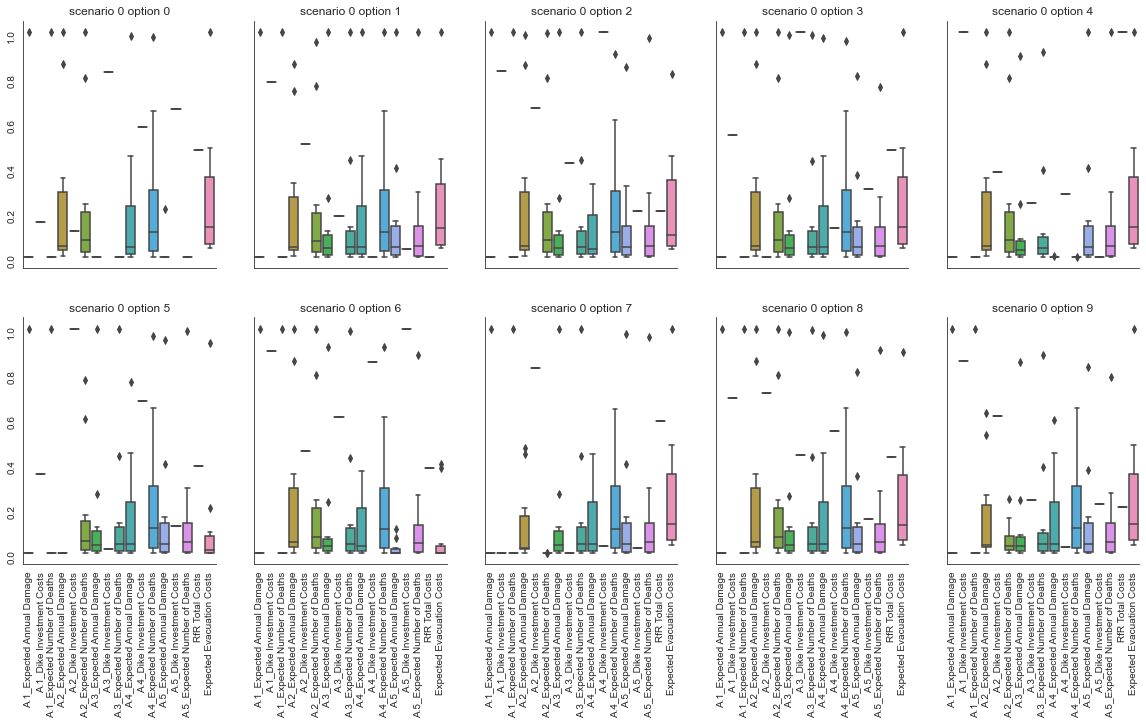

In [79]:
# this generates a 2 by 2 axes grid, with a shared X and Y axis
# accross all plots
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,10), 
                         sharey=True, sharex=True)

# to ensure easy iteration over the axes grid, we turn it
# into a list. Because there are ten plots, I hard coded
# this. 
axes = [axes[0,0], axes[0,1], axes[0,2], axes[0,3], axes[0,4],
        axes[1,0], axes[1,1], axes[1,2], axes[1,3], axes[1,4]]

# zip allows us to zip together the list of axes and the list of 
# key value pairs return by items. If we iterate over this
# it returns a tuple of length 2. The first item is the ax
# the second items is the key value pair.
for ax, (policy, regret) in zip(axes, policy_regret.items()):
    data = pd.DataFrame(regret)

    # we need to scale the regret to ensure fair visual
    # comparison. We can do that by divding by the maximum regret
    data = data/max_regret.max(axis=0)
    sns.boxplot(data=data, ax=ax)
    
    ax.tick_params(labelrotation=90)
    #plt.xticks(rotation=90)
    
    # removes top and left hand black outline of axes
    sns.despine()
    
    # ensure we know which policy the figure is for
    ax.set_title(str(policy))
    


plt.show()